### Week - 1 

In [171]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [172]:
df_steps= pd.read_csv(r'/Users/firatsoydinc/Desktop/Block - B/Machine Learning/OneDrive_1_11-29-2021/steps.csv',sep=';')
df_steps['mean'] = df_steps.loc[:,'20-6-2013':'13-5-2014'].mean(axis=1).dropna()
df_steps

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10205.521212
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687.423313
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8301.729730
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3633.200000
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.129630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,925,NaN,4571.0,10471.0,5899.0,15295.0,9178.0,9348.0,12229.0,13767.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6282.131868
925,926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4799.880000
926,927,NaN,NaN,NaN,1623.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10030.326829
927,928,NaN,NaN,14411.0,14364.0,26629.0,13092.0,9266.0,14949.0,43238.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15679.679012


In [173]:
#Import survey.csv
df_survey = pd.read_csv(r'/Users/firatsoydinc/Desktop/Block - B/Machine Learning/OneDrive_1_11-29-2021/survey.csv')
df_survey

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0
...,...,...,...,...,...,...,...,...,...
924,925,Lille,Female,45-54,3,4,Master or doctorate,165.0,59.0
925,926,Lille,Male,<25,3,5,Bachelor,192.0,90.0
926,927,Montpellier,Male,35-44,2,2,Bachelor,181.0,71.0
927,928,Lille,Female,55-64,1,1,High school,172.0,65.0


In [174]:
df_steps_mean=df_steps[['id','mean']]
df_steps_mean

,id,mean
0,1,10205.521212
1,2,5687.423313
2,3,8301.729730
3,4,3633.200000
4,5,5312.129630
...,...,...
924,925,6282.131868
925,926,4799.880000
926,927,10030.326829
927,928,15679.679012


In [175]:
df= pd.merge(left=df_survey,right=df_steps_mean, how= 'left',left_on=['id'],right_on=['id'])
df.head(5)

,id,city,gender,age,hh_size,education,education_1,height,weight,mean
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,10205.521212
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,5687.423313
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,8301.729730
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,3633.200000
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,5312.129630


#### Machine learning prediction cannot work with NaN variables so I drop NaN values 

In [176]:
df.dropna(inplace=True)

In [177]:
df['weight'].value_counts(ascending=True)

20.0      1
101.0     1
37.0      1
105.0     1
99.0      1
         ..
55.0     31
80.0     31
73.0     32
65.0     35
72.0     40
Name: weight, Length: 72, dtype: int64

<AxesSubplot:>

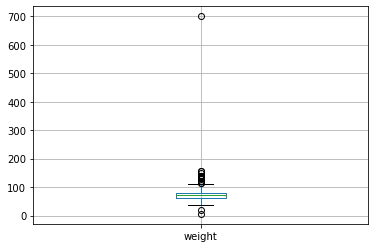

In [178]:
df.boxplot(column =['weight'])

Data above 200 and below 20 should be outlier, so I drop it from df 

In [179]:
df = df[(df['weight'] < 200)&(df['weight']>40)]

/Users/firatsoydinc/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mean', ylabel='Density'>

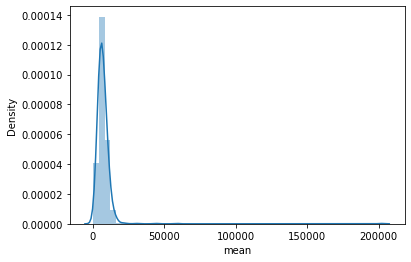

In [180]:
sns.distplot(df['mean'])

<AxesSubplot:>

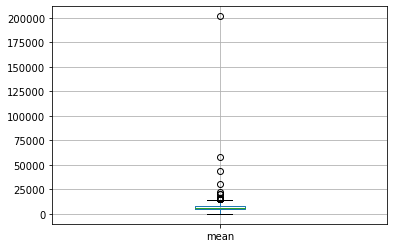

In [181]:
df.boxplot(column =['mean'])

<AxesSubplot:xlabel='weight', ylabel='height'>

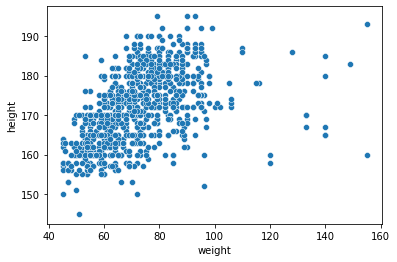

In [182]:
sns.scatterplot(data=df, x="weight", y="height")

<AxesSubplot:xlabel='mean', ylabel='weight'>

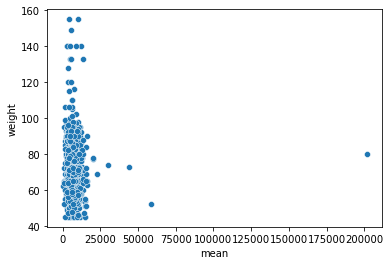

In [183]:
sns.scatterplot(data=df, x="mean",y='weight')

#### Regarding to scatter plot graph above datas which are above 17500 are dropped from dataframe.

In [184]:
df = df[(df['mean'] < 17500)]


<AxesSubplot:xlabel='mean', ylabel='weight'>

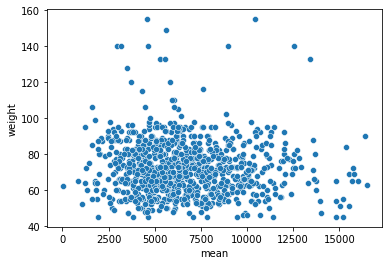

In [185]:
sns.scatterplot(data=df, x="mean",y='weight')

#### Mean variable is normally distributed.

/Users/firatsoydinc/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mean', ylabel='Density'>

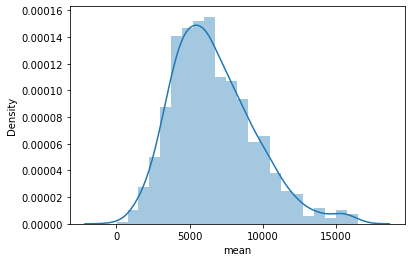

In [186]:
sns.distplot(df['mean'])

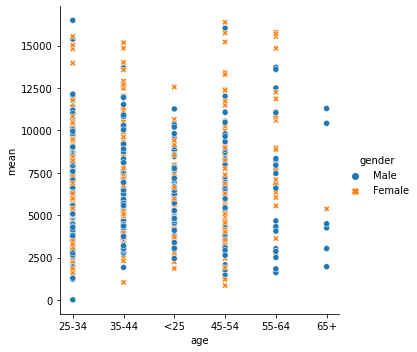

In [187]:
sns.relplot(
    data=df, x="age", y="mean",
    hue="gender", style="gender",
    kind="scatter"
)

In [188]:
df['bmi']= df['weight']/ ((df['height']/100)**2)
df

,id,city,gender,age,hh_size,education,education_1,height,weight,mean,bmi
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,10205.521212,30.930438
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,5687.423313,23.765432
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,8301.729730,25.617284
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,3633.200000,25.249337
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,5312.129630,21.872423
...,...,...,...,...,...,...,...,...,...,...,...
924,925,Lille,Female,45-54,3,4,Master or doctorate,165.0,59.0,6282.131868,21.671258
925,926,Lille,Male,<25,3,5,Bachelor,192.0,90.0,4799.880000,24.414062
926,927,Montpellier,Male,35-44,2,2,Bachelor,181.0,71.0,10030.326829,21.672110
927,928,Lille,Female,55-64,1,1,High school,172.0,65.0,15679.679012,21.971336


In [189]:
df.corr()

,id,hh_size,education,height,weight,mean,bmi
id,1.000000,-0.015995,-0.002455,0.021225,0.005864,0.029651,-0.004555
hh_size,-0.015995,1.000000,0.824425,-0.048094,0.004306,0.025072,0.031104
education,-0.002455,0.824425,1.000000,-0.031692,0.007515,0.006139,0.024902
height,0.021225,-0.048094,-0.031692,1.000000,0.509473,-0.074704,0.022690
weight,0.005864,0.004306,0.007515,0.509473,1.000000,-0.067719,0.866890
mean,0.029651,0.025072,0.006139,-0.074704,-0.067719,1.000000,-0.033311
bmi,-0.004555,0.031104,0.024902,0.022690,0.866890,-0.033311,1.000000


<AxesSubplot:xlabel='height', ylabel='weight'>

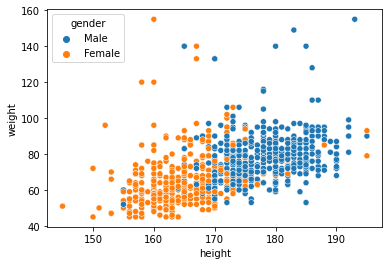

In [190]:
sns.scatterplot(data=df, x="height", y="weight", hue="gender")

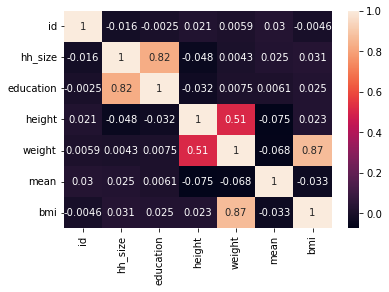

In [191]:
import matplotlib.pyplot as plt 
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [192]:
dms_1= pd.get_dummies(df[['gender']])
dms_1

,gender_Female,gender_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
924,1,0
925,0,1
926,0,1
927,1,0


In [193]:
df= pd.concat([df,dms_1],axis=1)
df.drop('gender',axis=1,inplace=True)

In [194]:
df.drop('gender_Female',axis=1,inplace=True)
df

,id,city,age,hh_size,education,education_1,height,weight,mean,bmi,gender_Male
0,1,Bordeaux,25-34,4,4,Master or doctorate,178.0,98.0,10205.521212,30.930438,1
1,2,Lille,35-44,1,3,Bachelor,180.0,77.0,5687.423313,23.765432,1
2,3,Montpellier,25-34,2,2,Master or doctorate,180.0,83.0,8301.729730,25.617284,1
3,4,Lyon,<25,1,1,Bachelor,178.0,80.0,3633.200000,25.249337,1
4,5,Montpellier,25-34,3,4,Bachelor,167.0,61.0,5312.129630,21.872423,0
...,...,...,...,...,...,...,...,...,...,...,...
924,925,Lille,45-54,3,4,Master or doctorate,165.0,59.0,6282.131868,21.671258,0
925,926,Lille,<25,3,5,Bachelor,192.0,90.0,4799.880000,24.414062,1
926,927,Montpellier,35-44,2,2,Bachelor,181.0,71.0,10030.326829,21.672110,1
927,928,Lille,55-64,1,1,High school,172.0,65.0,15679.679012,21.971336,0


In [195]:
df.rename(columns={"gender_Male": "gender"}, inplace=True)
df

,id,city,age,hh_size,education,education_1,height,weight,mean,bmi,gender
0,1,Bordeaux,25-34,4,4,Master or doctorate,178.0,98.0,10205.521212,30.930438,1
1,2,Lille,35-44,1,3,Bachelor,180.0,77.0,5687.423313,23.765432,1
2,3,Montpellier,25-34,2,2,Master or doctorate,180.0,83.0,8301.729730,25.617284,1
3,4,Lyon,<25,1,1,Bachelor,178.0,80.0,3633.200000,25.249337,1
4,5,Montpellier,25-34,3,4,Bachelor,167.0,61.0,5312.129630,21.872423,0
...,...,...,...,...,...,...,...,...,...,...,...
924,925,Lille,45-54,3,4,Master or doctorate,165.0,59.0,6282.131868,21.671258,0
925,926,Lille,<25,3,5,Bachelor,192.0,90.0,4799.880000,24.414062,1
926,927,Montpellier,35-44,2,2,Bachelor,181.0,71.0,10030.326829,21.672110,1
927,928,Lille,55-64,1,1,High school,172.0,65.0,15679.679012,21.971336,0


In [196]:
df.corr()

,id,hh_size,education,height,weight,mean,bmi,gender
id,1.000000,-0.015995,-0.002455,0.021225,0.005864,0.029651,-0.004555,0.041784
hh_size,-0.015995,1.000000,0.824425,-0.048094,0.004306,0.025072,0.031104,-0.017693
education,-0.002455,0.824425,1.000000,-0.031692,0.007515,0.006139,0.024902,0.000156
height,0.021225,-0.048094,-0.031692,1.000000,0.509473,-0.074704,0.022690,0.710353
weight,0.005864,0.004306,0.007515,0.509473,1.000000,-0.067719,0.866890,0.422118
mean,0.029651,0.025072,0.006139,-0.074704,-0.067719,1.000000,-0.033311,-0.055854
bmi,-0.004555,0.031104,0.024902,0.022690,0.866890,-0.033311,1.000000,0.085397
gender,0.041784,-0.017693,0.000156,0.710353,0.422118,-0.055854,0.085397,1.000000


In [197]:
y = df['mean']
X= df.drop(['id','mean','city','age','education_1'],axis=1)

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train.head()

,hh_size,education,height,weight,bmi,gender
264,1,1,192.0,90.0,24.414062,1
166,4,4,161.0,64.0,24.690405,0
662,2,5,174.0,76.0,25.102391,1
561,1,1,185.0,77.0,22.498174,1
428,2,2,163.0,80.0,30.110279,0


### Lineer Regression 

#### Lineer regression is the correlation between variables. It's generally using for finding the variables which has effect to another.

In [199]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [200]:
coef = pd.DataFrame(X.columns.values, lm.coef_) 
coef

,0
180.923713,hh_size
-131.826588,education
16.265024,height
-45.545226,weight
102.209906,bmi
182.735018,gender


In [201]:
y_test_p = lm.predict(X_test)
r2_score(y_test, y_test_p)

0.0054309565547998595

rˆ2 value is too low, so its not enough to explain the data 

In [202]:
math.sqrt(mean_squared_error(y_test, y_test_p))

2774.748371287252

RMSE value is 2774, its hard to say RMSE is  high or low so we need to learn the backgroud of data.  

/Users/firatsoydinc/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predicted rating')

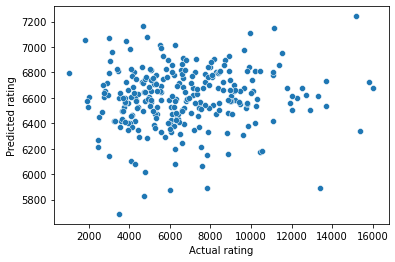

In [207]:
sns.scatterplot(y_test, y_test_p)
plt.xlabel('Actual rating')
plt.ylabel('Predicted rating')